In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
df = pd.read_excel("./dados bootcamp/HEART ATTACK/heart_train.xlsx")
df = df.astype('float64') # Scikit learn recomenda emprego de tipos float64
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,53.802885,0.677885,0.995192,131.634615,248.56250,0.134615,0.538462,149.326923,0.326923,0.979808,1.427885,0.697115,2.307692,0.538462
std,9.346502,0.468414,1.028566,17.050115,54.97743,0.342136,0.527927,23.141423,0.470221,1.055822,0.593517,1.026034,0.582796,0.499721
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,212.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.500000,1.000000,1.000000,130.000000,241.50000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,564.00000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


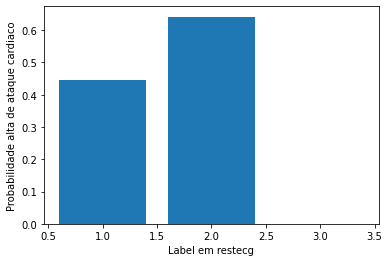

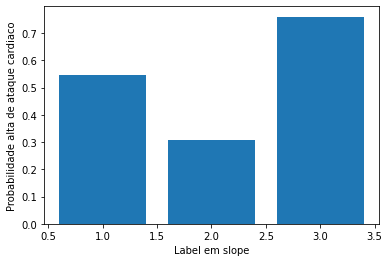

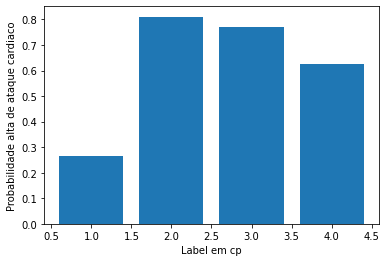

In [209]:
# Visializando os dados categóricos

for category in ['restecg', 'slope']:
    data = []
    for i in range(3):
        df_cat = df.loc[ df[category] == i, ['target']]
        total = df_cat.shape[0]
        attack = df_cat[df_cat['target'] == 1].shape[0]
        data.append(attack/total)
    plt.bar([1, 2, 3], data)
    plt.xlabel(f"Label em {category}")
    plt.ylabel("Probabilidade alta de ataque cardiaco")
    plt.show()

data = []
for i in range(4):
    df_cat = df.loc[ df['cp'] == i, ['target']]
    total = df_cat.shape[0]
    attack = df_cat[df_cat['target'] == 1].shape[0]
    data.append(attack/total)
plt.bar([1, 2, 3, 4], data)
plt.xlabel("Label em cp")
plt.ylabel("Probabilidade alta de ataque cardiaco")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       208 non-null    float64
 1   sex       208 non-null    float64
 2   cp        208 non-null    float64
 3   trestbps  208 non-null    float64
 4   chol      208 non-null    float64
 5   fbs       208 non-null    float64
 6   restecg   208 non-null    float64
 7   thalach   208 non-null    float64
 8   exang     208 non-null    float64
 9   oldpeak   208 non-null    float64
 10  slope     208 non-null    float64
 11  ca        208 non-null    float64
 12  thal      208 non-null    float64
 13  target    208 non-null    float64
dtypes: float64(14)
memory usage: 22.9 KB
None


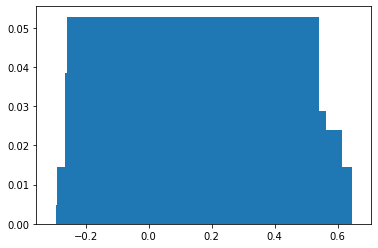

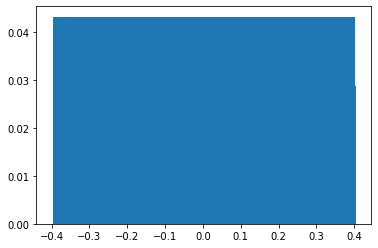

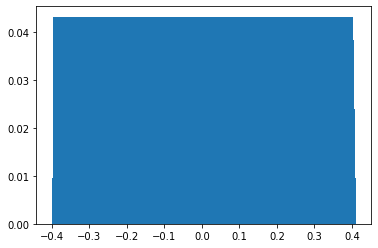

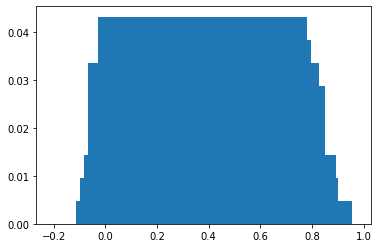

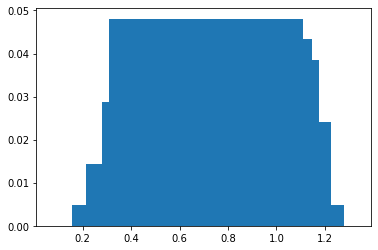

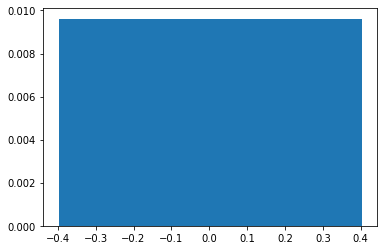

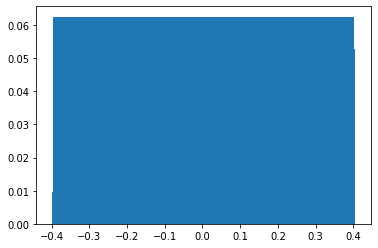

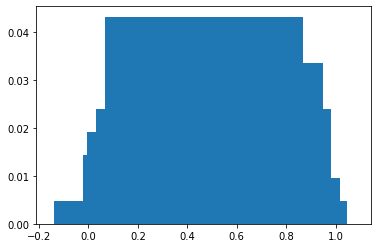

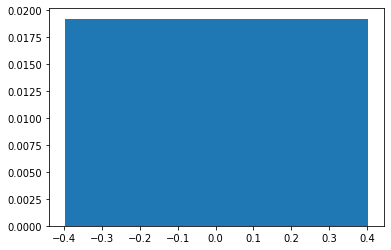

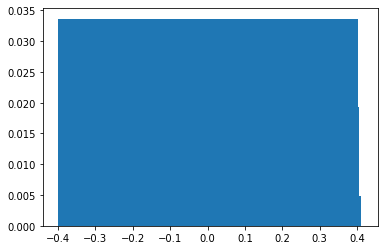

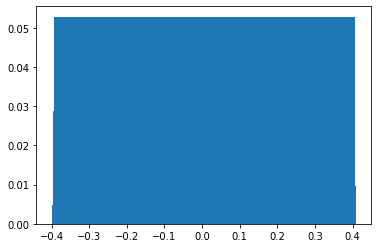

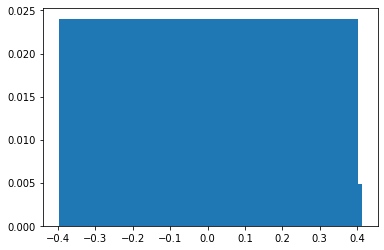

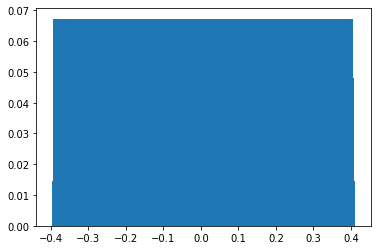

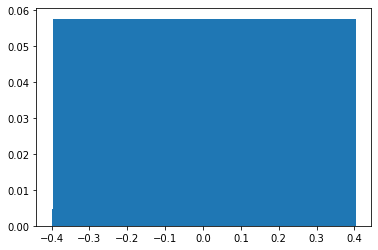

In [242]:
from sklearn.preprocessing import normalize

# Visualizando relação entre dados e incidência de ataques cardíacos

# Normalizando os dados para visualização
y = df.target.values.T
X = normalize(df.values, axis=1)

for column in X.T:
    data = []
    # Gerando correlações
    bins = np.linspace(column.min(), column.max())
    for i in range(len(bins)-1):

        positive = 0
        bin_column = np.logical_and(column > bins[i], column < bins[i+1]).astype(int)
                
        for j in np.nonzero(bin_column)[0]:
            if y[j] == 1:
                positive += 1
        data.append(positive / column.shape[0])
    plt.bar(bins[:-1], data)
    plt.show()
    




In [211]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Carregando dataset
df = pd.read_excel("./dados bootcamp/HEART ATTACK/heart_train.xlsx")
df = df.astype('float64') # Scikit learn recomenda emprego de tipos float64


# Normalizando os dados categóricos
restecg = df.restecg.values.reshape(-1, 1)
slope = df.slope.values.reshape(-1, 1)
cp = df.cp.values.reshape(-1, 1)

df.pop('restecg')
df.pop('slope')
df.pop('cp')

restecg -= 1
slope -= 1

# Separando labels do target
y = df.pop('target')
X = df

# Normalizando os dados numéricos
X_norm = normalize(X, axis=0)

# Recolodando os dados categóricos
X_norm = np.append(X_norm, restecg, axis=1)
X_norm = np.append(X_norm, slope, axis=1)
X_norm = np.append(X_norm, cp, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.6, random_state=0)

# Aplicando Regressão Logística
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)

regressor.score(X_test, y_test)


0.7023809523809523